In [ ]:
import os
import glob
import json
import numpy as np
import cv2

from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint

In [ ]:
train_path='/content/drive/MyDrive/BrainTumor/train/'
test_path='/content/drive/MyDrive/BrainTumor/test/'
valid_path='/content/drive/MyDrive/BrainTumor/valid/'

In [ ]:
train_data=[image for image in os.listdir(train_path)]
test_data=[image for image in os.listdir(test_path)]
valid_data=[image for image in os.listdir(valid_path)]

Load Annotation (Give labels to specific parts in an image or text for example car or special word)

In [ ]:
train_annotation=glob.glob(os.path.join(train_path,"*.json"))
test_annotation=glob.glob(os.path.join(test_path,"*.json"))
valid_annotation=glob.glob(os.path.join(valid_path,"*.json"))

In [ ]:
train_annotation=json.load(open(train_annotation[0]))
test_annotation=json.load(open(test_annotation[0]))
valid_annotation=json.load(open(valid_annotation[0]))

Show Image and annotation Random Image

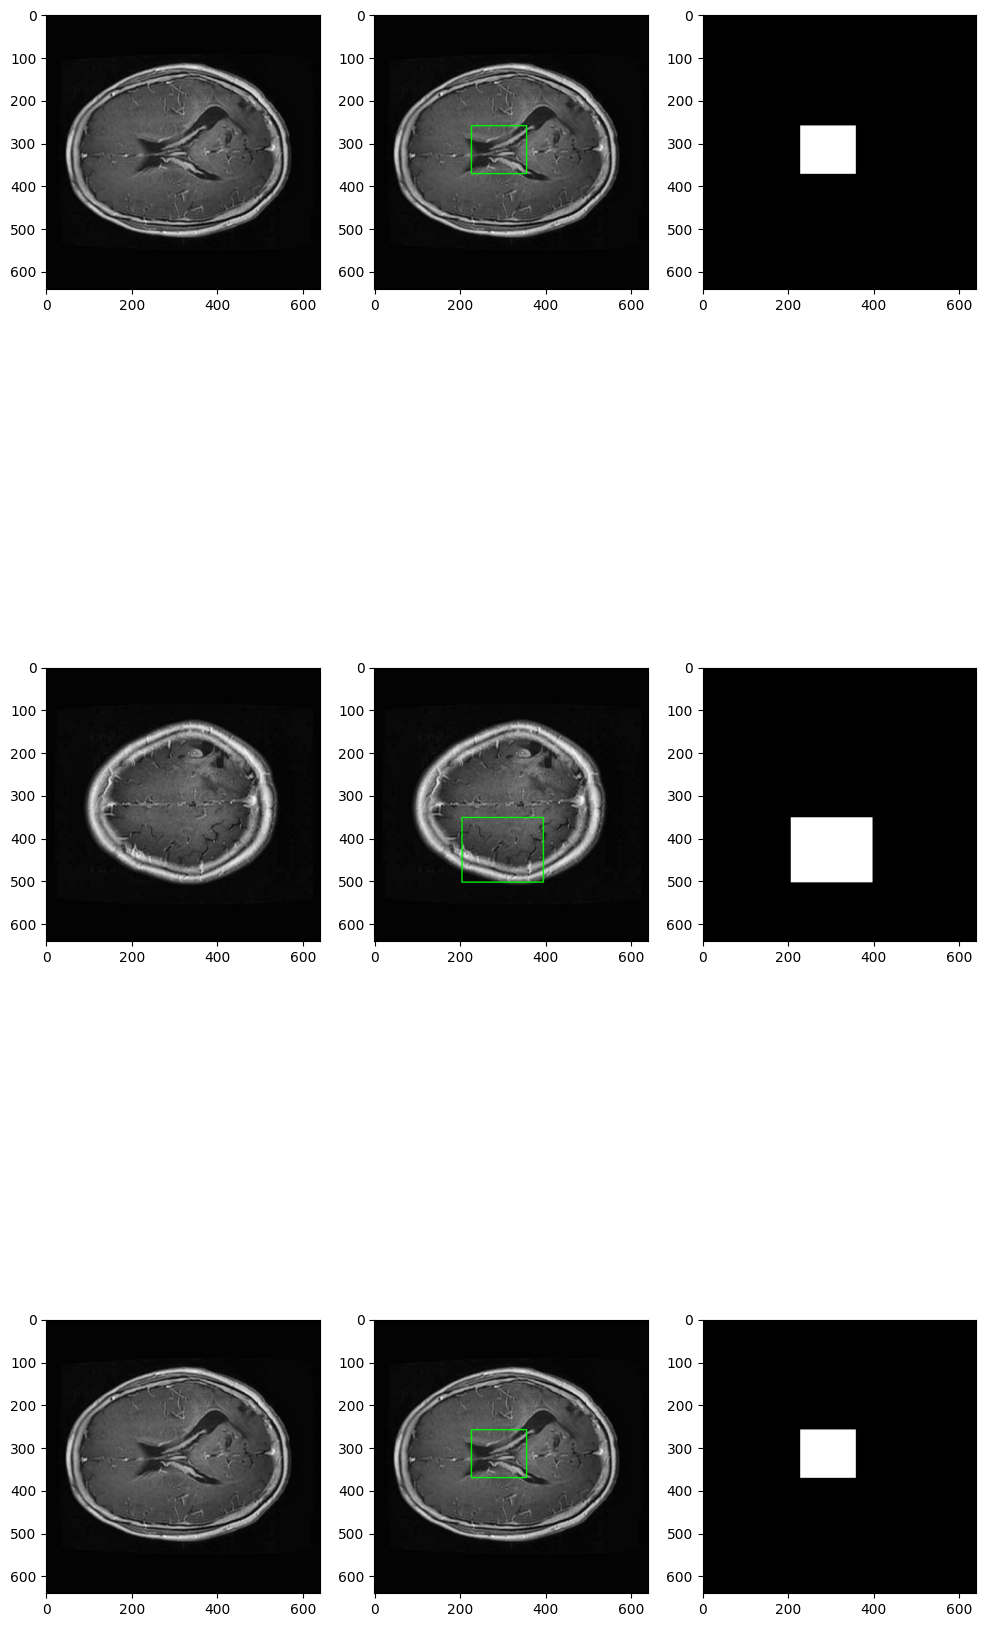

In [ ]:
import matplotlib.pyplot as plt

def visualize_random_images(n=3): # select n random images

  # use cv and plt to show these images
  indices = np.random.randint(0, len(train_annotation['images']), size=n)

    #Image and Annotation Retrieval:
  images =[train_annotation['images'][i] for i in indices ]
  annotations = [train_annotation['annotations'][i] for i in indices ]

  j=1
  plt.figure(figsize=(12, 4 * 2 * n))
  for img,ann in zip(images,annotations):

    plt.subplot(n,3,j)
    j+=1
    image = cv2.imread(train_path + img['file_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

    # create masked images from annotations
    segmentation = ann['segmentation']
    segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2) #convert 1D into 2D

    cv2.polylines(image, [segmentation], isClosed=True, color=(0, 255, 0), thickness=2)  # Green color with thickness 2

    plt.subplot(n,3,j)
    plt.imshow(image)
    j+=1

    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    cv2.fillPoly(mask, [segmentation], color=1)
    plt.subplot(n,3,j)
    plt.imshow(mask,cmap='gray')
    j+=1

visualize_random_images()

Apply mask For all images

In [ ]:
def _train_masks():
    print('train masks')
    mask_dir = '/content/drive/MyDrive/BrainTumor/train_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    totalImages = len(train_annotation['images'])
    done = 0
    for img,ann in zip(train_annotation['images'],train_annotation['annotations']):
        path = train_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1
        print(f"train  {done} / {totalImages} ")

def _test_masks():
    print('test masks')

    totalImages = len(test_annotation['images'])
    done = 0
    mask_dir = '/content/drive/MyDrive/BrainTumor/test_masks/'
    os.makedirs(mask_dir, exist_ok=True)

    for img,ann in zip(test_annotation['images'],test_annotation['annotations']):
        path = test_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1

        print(f"test  {done} / {totalImages} ")


def _val_masks():
    print('val masks')
    totalImages = len(valid_annotation['images'])
    done = 0
    mask_dir = '/content/drive/MyDrive/BrainTumor/val_masks/'
    os.makedirs(mask_dir, exist_ok=True)

    for img,ann in zip(valid_annotation['images'],valid_annotation['annotations']):
        path = valid_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1
        print(f"val  {done} / {totalImages} ")


from threading import Thread
def make_masks():
  threads = []
  threads.append( Thread(target=_train_masks))

  threads.append( Thread(target=_test_masks))

  threads.append( Thread(target=_val_masks))
  for t in threads:
    t.start()
  for t in threads:
    t.join()
  print('complete')
  return

make_masks()

train masks
test masks
val masks
test  1 / 215 
test  2 / 215 
val  1 / 429 
test  3 / 215 
train  1 / 1502 
val  2 / 429 
test  4 / 215 
test  5 / 215 
train  2 / 1502 
val  3 / 429 
test  6 / 215 
val  4 / 429 
train  3 / 1502 
test  7 / 215 
train  4 / 1502 
test  8 / 215 
val  5 / 429 
train  5 / 1502 
test  9 / 215 
val  6 / 429 
test  10 / 215 
train  6 / 1502 
test  11 / 215 
val  7 / 429 
train  7 / 1502 
test  12 / 215 
val  8 / 429 
test  13 / 215 
train  8 / 1502 
test  14 / 215 
val  9 / 429 
train  9 / 1502 
test  15 / 215 
val  10 / 429 
test  16 / 215 
train  10 / 1502 
test  17 / 215 
val  11 / 429 
test  18 / 215 
train  11 / 1502 
test  19 / 215 
val  12 / 429 
test  20 / 215 
train  12 / 1502 
val  13 / 429 
test  21 / 215 
train  13 / 1502 
val  14 / 429 
test  22 / 215 
train  14 / 1502 
test  23 / 215 
val  15 / 429 
test  24 / 215 
train  15 / 1502 
test  25 / 215 
test  26 / 215 
train  16 / 1502 
val  16 / 429 
test  27 / 215 
test  28 / 215 
val  17 / 429 
tes

Preprocess Data

In [ ]:
def load_data():
    target_size = (128, 128)
    train_mask_dir = '/content/drive/MyDrive/BrainTumor/train_masks/'

    X_train =  [cv2.resize(cv2.imread(train_path + image['file_name']),target_size) for image in train_annotation['images']]
    y_train = [cv2.resize(cv2.imread(train_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size ) for image in train_annotation['images']]
    X_train = np.array(X_train)
    y_train = np.expand_dims(np.array(y_train), axis=-1)

    X_train = X_train.astype('float32') / 255.0
    y_train = y_train.astype('float32') / 255.0
    y_train = (y_train > 0.5).astype(np.float32)





    val_mask_dir = '/content/drive/MyDrive/BrainTumor/val_masks/'
    X_val =  [cv2.resize(cv2.imread(valid_path + image['file_name']),target_size) for image in valid_annotation['images']]
    y_val = [cv2.resize(cv2.imread(val_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size) for image in valid_annotation['images']]
    X_val = np.array(X_val)
    y_val = np.expand_dims(np.array(y_val), axis=-1)

    X_val = X_val.astype('float32') / 255.0
    y_val = y_val.astype('float32') / 255.0
    y_val = (y_val > 0.5).astype(np.float32)

    return X_train,y_train,X_val,y_val



def load_test_data():
    target_size = (128, 128)

    test_mask_dir = '/content/drive/MyDrive/BrainTumor/test_masks/'
    X_test =  [cv2.resize(cv2.imread(test_path + image['file_name']),target_size) for image in test_annotation['images']]
    y_test = [cv2.resize(cv2.imread(test_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size) for image in test_annotation['images']]
    X_test = np.array(X_test)
    y_test = np.expand_dims(np.array(y_test), axis=-1)


    X_test = X_test.astype('float32') / 255.0
    y_test = y_test.astype('float32') / 255.0
    y_test = (y_test > 0.5).astype(np.float32)
    return X_test,y_test

In [ ]:
X_train,y_train,X_val,y_val = load_data()

Segmentation Model

In [ ]:
#2 layers defined and apply activation fun on it
def double_conv_block(x, n_filters):

    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)

    return x

In [ ]:
#Used in UNet combine features extraction(ThroughConvoLayer)+maxpooling layers+dropupout(Used to avoid overfitting)
#downsampling used for encoding
def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)

    return f, p

In [ ]:
#part of Unet use for decoding convert resized image of encoding into original size so that predictions can
#be more accurate plus apply dropout to avoid unnecessary information and last one more layaer to capture complex
#results

def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)

    return x

In [ ]:

def build_unet_model():

    # inputs
    inputs = layers.Input(shape=(128,128,3))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)

    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(u9)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model
unet_model = build_unet_model()

In [ ]:
unet_model.compile(optimizer="adam",loss="BinaryCrossentropy",metrics=["accuracy"])

In [ ]:
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64, 64, 64)     │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32, 32, 128)    │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 16, 16, 256)    │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 512)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 8, 8, 512)      │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 34,513,345 (131.66 MB)

 Trainable params: 34,513,345 (131.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',patience=5) # if model will not improve upto 5 epochs on validaton loss
#then will stop training it help in avoiding overfitting



callbacks_list = [earlystop]

unet_model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val),callbacks=callbacks_list)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step - accuracy: 0.9633 - loss: 0.1025 - val_accuracy: 0.9627 - val_loss: 0.1139
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.9620 - loss: 0.1044 - val_accuracy: 0.9627 - val_loss: 0.1050
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 470ms/step - accuracy: 0.9629 - loss: 0.1020 - val_accuracy: 0.9645 - val_loss: 0.0963
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 449ms/step - accuracy: 0.9655 - loss: 0.0952 - val_accuracy: 0.9649 - val_loss: 0.0935
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 449ms/step - accuracy: 0.9649 - loss: 0.0960 - val_accuracy: 0.9664 - val_loss: 0.0920
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 471ms/step - accuracy: 0.9652 - loss: 0.0945 - val_accuracy: 0.9679 - val_loss: 0.0862
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 450ms/step - accuracy: 0.9643 - loss: 0.0975 - val_accuracy: 0.9680 - val_loss: 0.0865
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 450ms/step - accuracy: 0.9674 - loss: 0.0891 - val_accu

Prediction

In [ ]:
def predict(image_path, model, threshold=0.5):

    # Read and preprocess the image
    image = cv2.imread(image_path)
    print("Original Image Shape:", image.shape)

    # Resize the image to match model's expected sizing
    resized_image = cv2.resize(image, (128, 128))
    print("Resized Image Shape:", resized_image.shape)

    # Expand dimensions to match the batch size used by the model
    input_image = np.expand_dims(resized_image, axis=0)

    # Preprocess input (normalize to [0, 1] range)
    input_image = input_image.astype('float32') / 255.0

    # Perform prediction
    pred_mask = model.predict(input_image)

    # Apply threshold to prediction mask
    pred_mask[pred_mask >= threshold] = 1  # set values >= threshold to 1 (foreground)
    pred_mask[pred_mask < threshold] = 0   # set values < threshold to 0 (background)

    # If your model outputs probabilities, you might need to squeeze the mask
    pred_mask = np.squeeze(pred_mask, axis=0)

    # Count number of pixels where mask is 1 (foreground)
    num_pixels = np.count_nonzero(pred_mask)
    print("shape mask",pred_mask.shape)
    return pred_mask


Show Result

Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
shape mask (128, 128, 1)


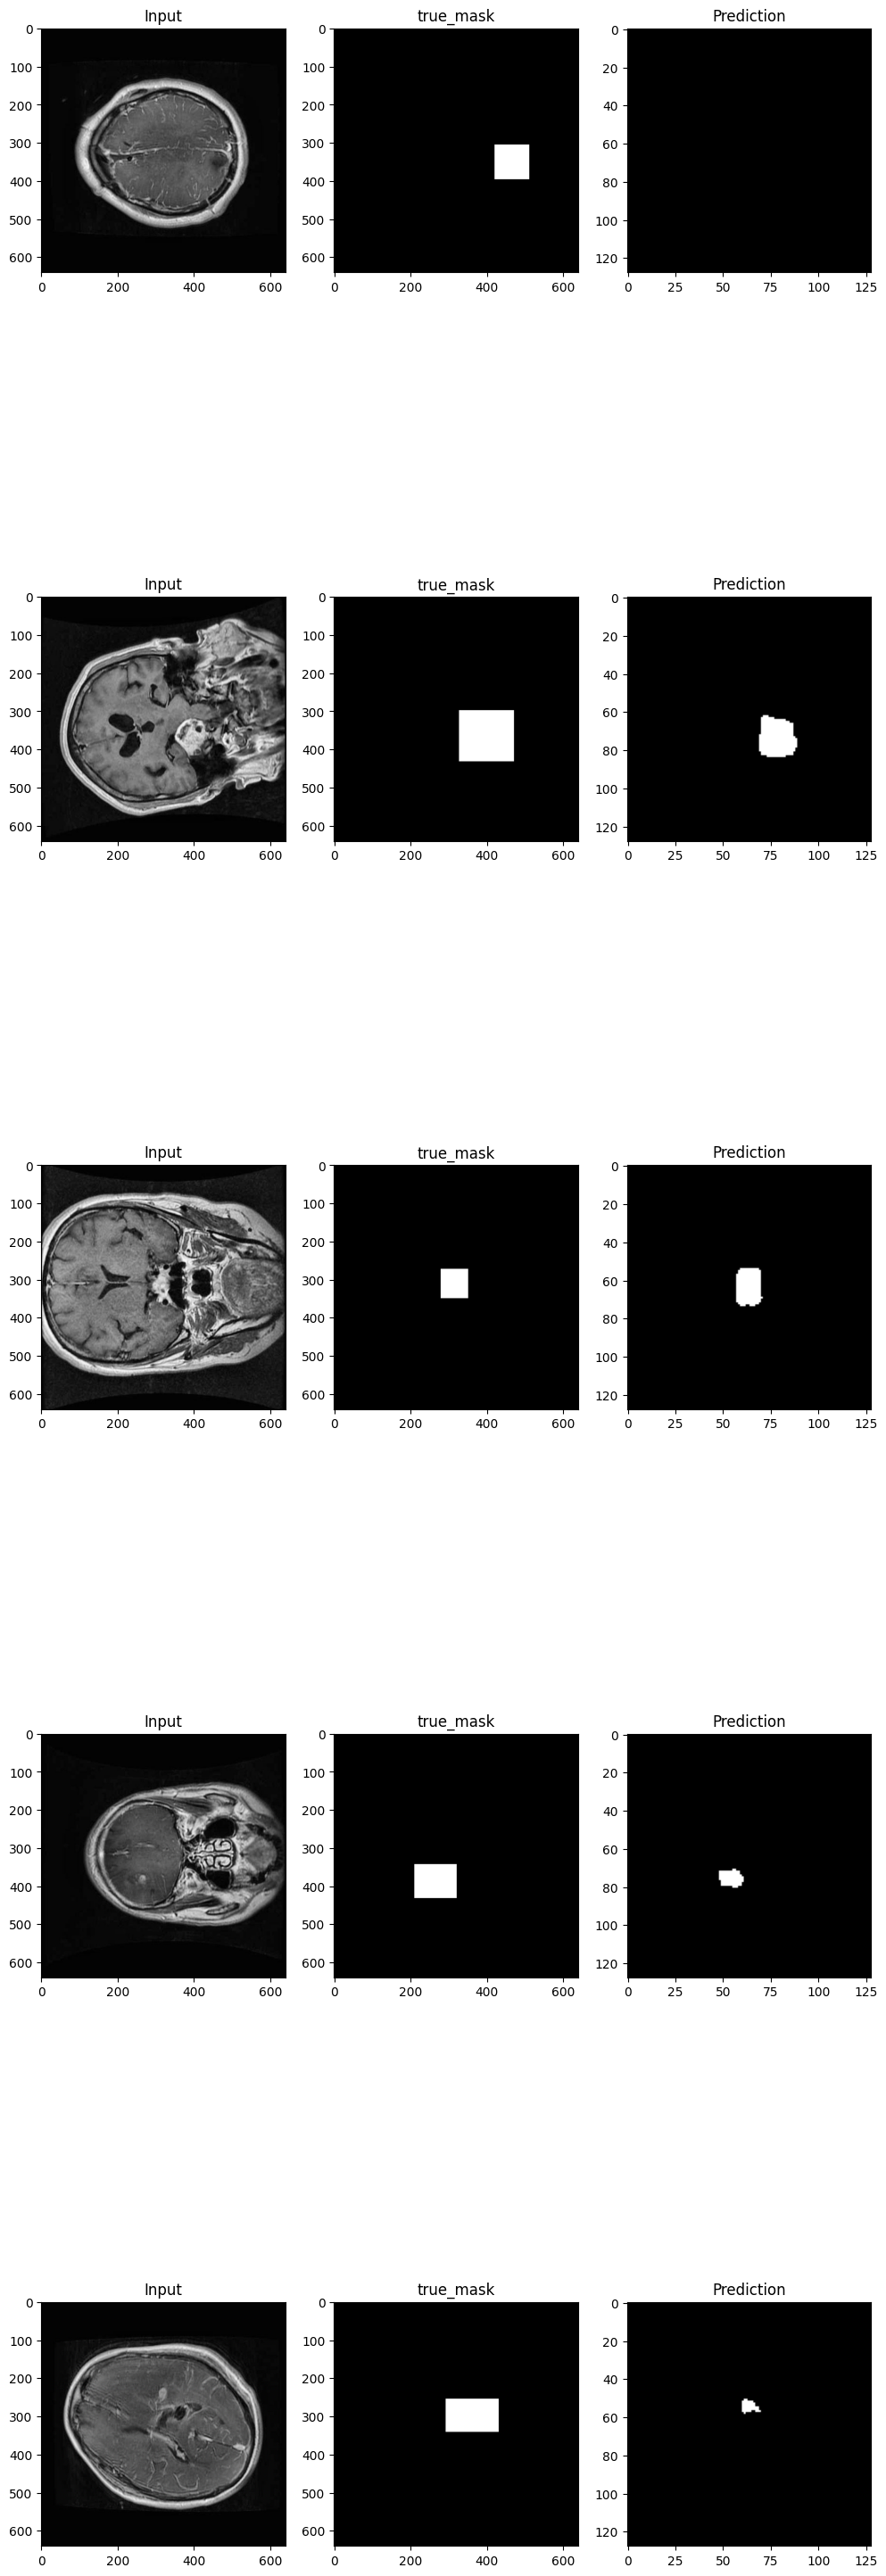

In [ ]:
import matplotlib.pyplot as plt
def test_random_images(n=5):
  # select n random images
  # use cv and plt to show these images
    test_mask_dir = '/content/drive/MyDrive/BrainTumor/test_masks/'

    indices = np.random.randint(0, len(test_annotation['images']), size=n)

    images =[test_annotation['images'][i] for i in indices ]

    annotations = [test_annotation['annotations'][i] for i in indices ]
    j=1
    plt.figure(figsize=(12, 4 * 2 * n))
    for img,ann in zip(images,annotations):
        plt.subplot(n,3,j)
        j+=1
        image = cv2.imread(test_path + img['file_name'])

        plt.imshow(image)
        plt.title("Input")
        mask = predict(test_path + img['file_name'],unet_model)

        result_image = np.zeros((128, 128,1), dtype=np.uint8)
        result_image[mask == 1] = 255

        true_mask = cv2.imread(test_mask_dir + img['file_name'])
        plt.subplot(n,3,j)
        j+=1
        plt.imshow(true_mask)
        plt.title("true_mask")

        plt.subplot(n,3,j)
        j+=1
        plt.imshow(result_image,cmap='gray')
        plt.title("Prediction")

test_random_images()